# Check the different components of the gravitational force on the ISM, above and below the galactic mid-plane

In [1]:
import numpy as np
import h5py
import glob, os, re, sys
sys.path.append('../')

from PRFMData import PRFMDataset
import astro_helper as ah

import configparser
config = configparser.ConfigParser()
config.read('./config/config_weights.ini')

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as patches
from matplotlib import rc
rc('axes', linewidth=1.5)
rc('axes', edgecolor='#3C3C3C')
plt.style.use('mpl_style_Jeffreson.mplstyle')
custom_colors = {
    'grey': '#3C3C3C',
    'turquoise': '#5E9F87'
}

In [2]:
ETG_vlM = PRFMDataset(
    params = config["ETG-vlM"],
    galaxy_type="ETG-vlM",
    total_height=0.3, # kpc
    Rmax=2., # kpc
    phibin_sep=np.pi/12.,
    snapname="snap-DESPOTIC_100.hdf5",
    exclude_temp_above=1.e4,
    exclude_avir_below=2.,
    realign_galaxy_to_gas=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

In [3]:
ETG_lowM = PRFMDataset(
    params = config["ETG-lowM"],
    galaxy_type="ETG-lowM",
    total_height=0.3, # kpc
    Rmax=2., # kpc
    phibin_sep=np.pi/12.,
    snapname="snap-DESPOTIC_100.hdf5",
    exclude_temp_above=1.e4,
    exclude_avir_below=2.,
    realign_galaxy_to_gas=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

In [4]:
ETG_medM = PRFMDataset(
    params = config["ETG-medM"],
    galaxy_type="ETG-medM",
    total_height=0.3, # kpc
    Rmax=2., # kpc
    phibin_sep=np.pi/12.,
    snapname="snap-DESPOTIC_100.hdf5",
    exclude_temp_above=1.e4,
    exclude_avir_below=2.,
    realign_galaxy_to_gas=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

In [5]:
ETG_hiM = PRFMDataset(
    params = config["ETG-hiM"],
    galaxy_type="ETG-hiM",
    total_height=0.3, # kpc
    Rmax=2., # kpc
    phibin_sep=np.pi/12.,
    snapname="snap-DESPOTIC_100.hdf5",
    exclude_temp_above=1.e4,
    exclude_avir_below=2.,
    realign_galaxy_to_gas=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

In [6]:
NGC300 = PRFMDataset(
    params = config["NGC300"],
    galaxy_type="NGC300",
    total_height=1.5, # kpc
    Rmax=6., # kpc
    phibin_sep=np.pi/12.,
    snapname="snap-DESPOTIC_799.hdf5",
    exclude_temp_above=1.e4,
    exclude_avir_below=2.,
    realign_galaxy_to_gas=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

In [7]:
MW = PRFMDataset(
    params = config["MW"],
    galaxy_type="MW",
    total_height=1.5, # kpc
    Rmax=6., # kpc
    phibin_sep=np.pi/12.,
    snapname="snap-DESPOTIC_600.hdf5",
    exclude_temp_above=1.e4,
    exclude_avir_below=2.,
    realign_galaxy_to_gas=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

# 2D view of the integrated force on each side of the disk, and the net force pushing/skewing the disk

In [9]:
forceleft_vlM, forceright_vlM, z_mp_idcs = ETG_vlM.get_int_force_left_right_Rphi()
print(np.shape(forceleft_vlM))

(8, 24)


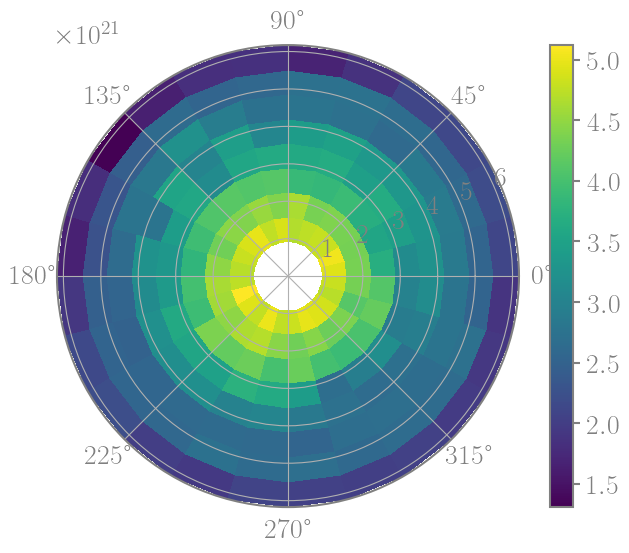

In [10]:
plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
pcm = plt.pcolormesh(
    ETG_vlM.phibin_centers, ETG_vlM.Rbin_centers,
    np.log10(np.fabs(forceleft_vlM/ah.kB_cgs)),
    cmap='viridis', shading='auto'
)
plt.colorbar()
plt.show()

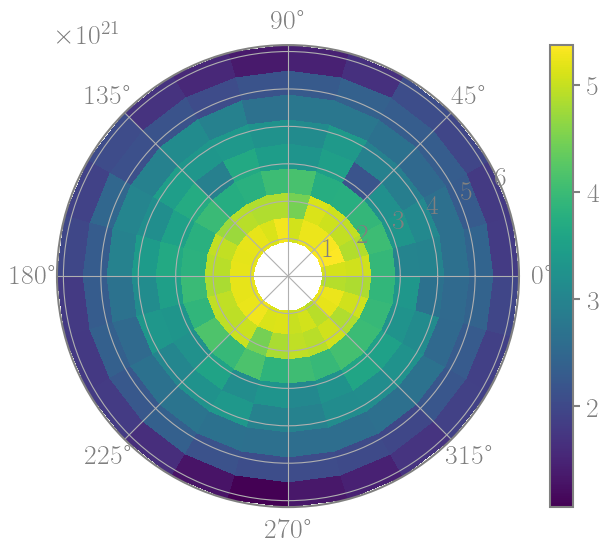

In [11]:
plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
pcm = plt.pcolormesh(
    ETG_vlM.phibin_centers, ETG_vlM.Rbin_centers,
    np.log10(np.fabs(forceright_vlM/ah.kB_cgs)),
    cmap='viridis', shading='auto'
)
plt.colorbar()
plt.show()

In [12]:
forcenet_vlM = ETG_vlM.get_force_Rphi()
print(np.shape(forcenet_vlM))

(8, 24)


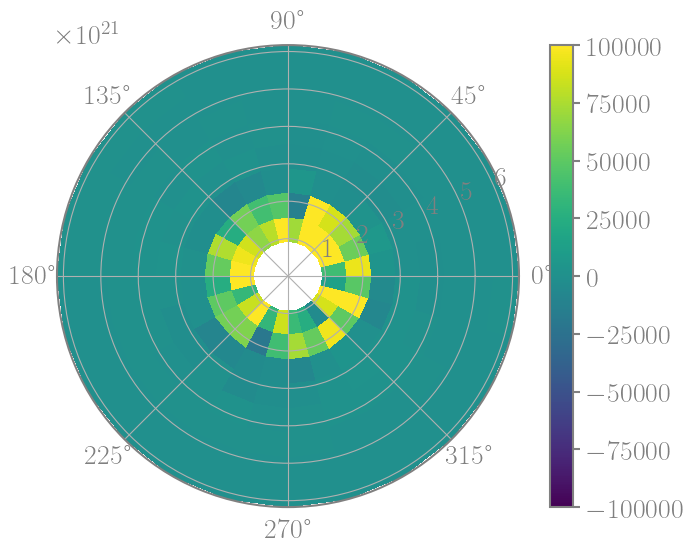

In [13]:
plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
pcm = plt.pcolormesh(
    ETG_vlM.phibin_centers, ETG_vlM.Rbin_centers,
    forcenet_vlM/ah.kB_cgs, vmin=-1.e5, vmax=1.e5,
    cmap='viridis', shading='auto'
)
plt.colorbar()
plt.show()

In [14]:
forcenet_lowM = ETG_lowM.get_force_Rphi()
print(np.shape(forcenet_lowM))

(8, 24)


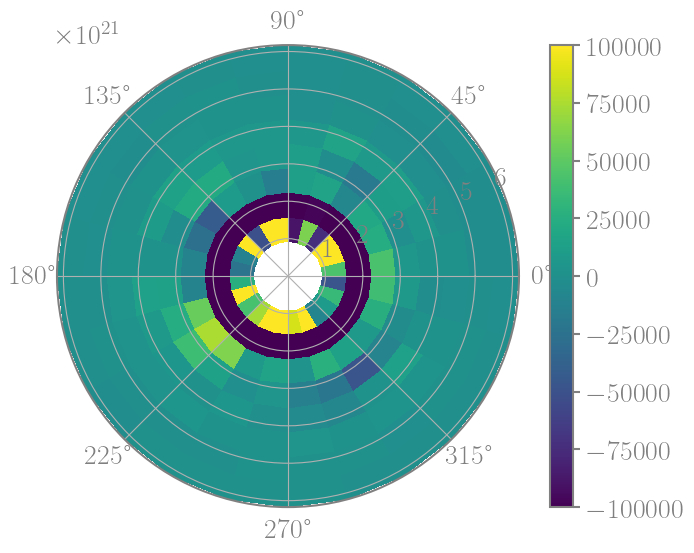

In [15]:
plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
pcm = plt.pcolormesh(
    ETG_lowM.phibin_centers, ETG_lowM.Rbin_centers,
    forcenet_lowM/ah.kB_cgs, vmin=-1.e5, vmax=1.e5,
    cmap='viridis', shading='auto'
)
plt.colorbar()
plt.show()

In [16]:
forcenet_medM = ETG_medM.get_force_Rphi()
print(np.shape(forcenet_medM))

(8, 24)


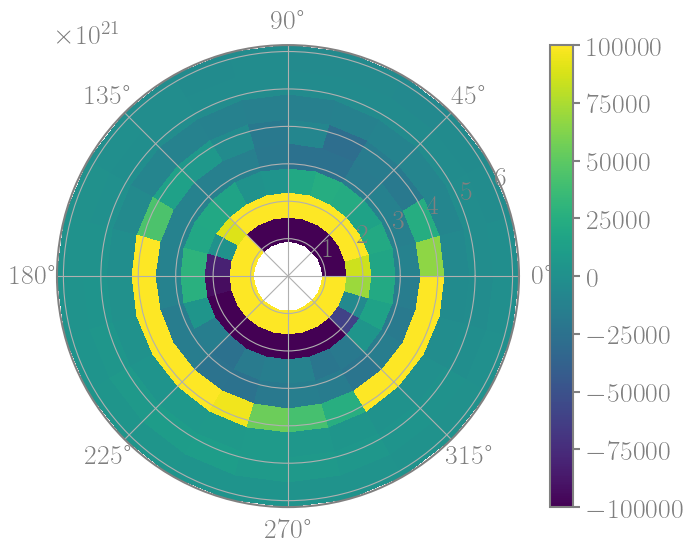

In [17]:
plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
pcm = plt.pcolormesh(
    ETG_medM.phibin_centers, ETG_medM.Rbin_centers,
    forcenet_medM/ah.kB_cgs, vmin=-1.e5, vmax=1.e5,
    cmap='viridis', shading='auto'
)
plt.colorbar()
plt.show()

In [18]:
forcenet_hiM = ETG_hiM.get_force_Rphi()
print(np.shape(forcenet_hiM))

(8, 24)


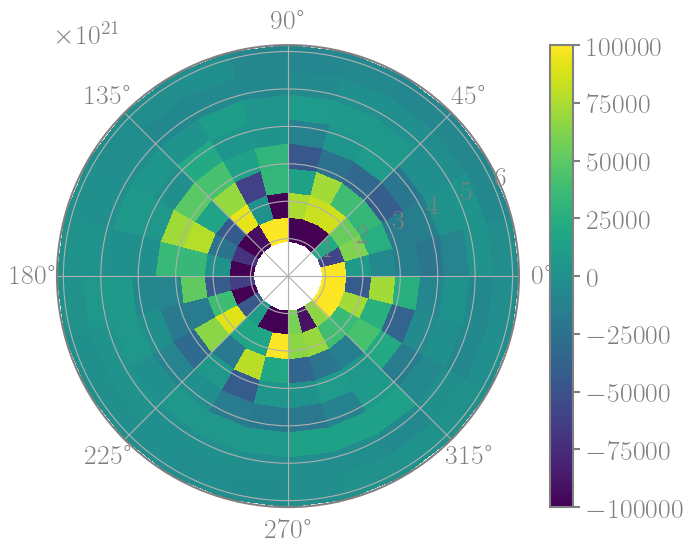

In [19]:
plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
pcm = plt.pcolormesh(
    ETG_hiM.phibin_centers, ETG_hiM.Rbin_centers,
    forcenet_hiM/ah.kB_cgs, vmin=-1.e5, vmax=1.e5,
    cmap='viridis', shading='auto'
)
plt.colorbar()
plt.show()

In [20]:
forcenet_NGC300 = NGC300.get_force_Rphi()
print(np.shape(forcenet_NGC300))

(28, 24)


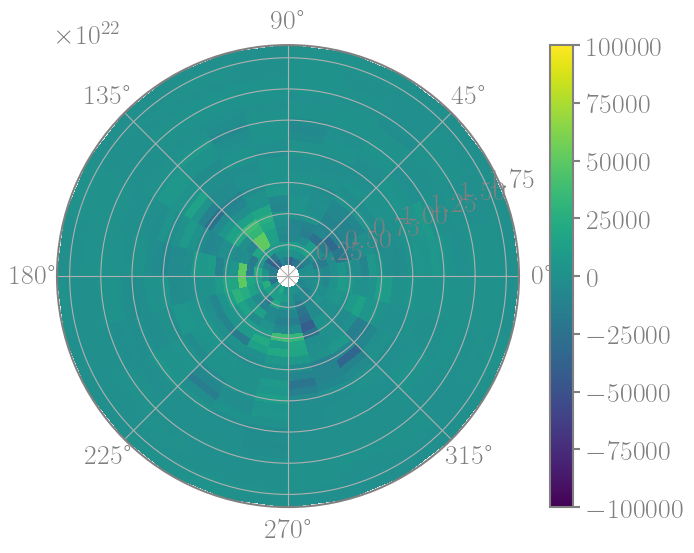

In [21]:
plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
pcm = plt.pcolormesh(
    NGC300.phibin_centers, NGC300.Rbin_centers,
    forcenet_NGC300/ah.kB_cgs, vmin=-1.e5, vmax=1.e5,
    cmap='viridis', shading='auto'
)
plt.colorbar()
plt.show()

In [22]:
forcenet_MW = MW.get_force_Rphi()
print(np.shape(forcenet_MW))

(28, 24)


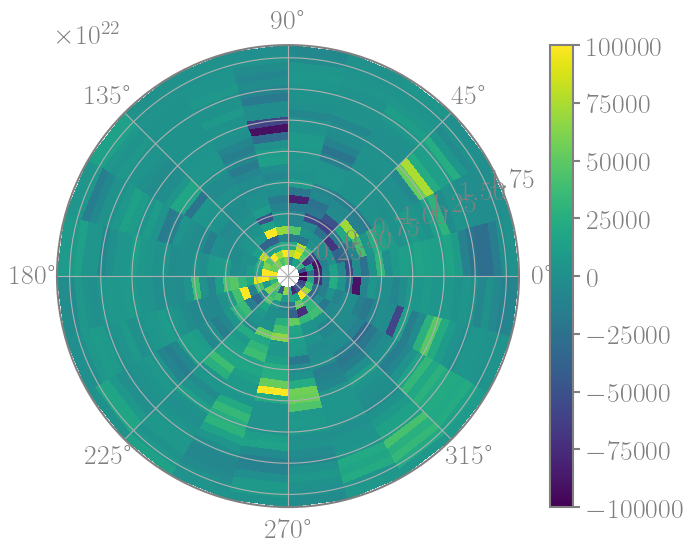

In [23]:
plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
pcm = plt.pcolormesh(
    MW.phibin_centers, MW.Rbin_centers,
    forcenet_MW/ah.kB_cgs, vmin=-1.e5, vmax=1.e5,
    cmap='viridis', shading='auto'
)
plt.colorbar()
plt.show()